In [46]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import pandas as pd
#import umap
import umap.umap_ as umap
import seaborn as sns
import glob

In [2]:
#Read csv files
df1 = pd.read_csv('shuffled_Tetra_output.csv', sep=',', header=None)
df2 = pd.read_csv('bacterial_Tetra_output.csv', sep=',', header=None)
df3 = pd.read_csv('CDS_tetra_output.csv', sep=',', header=None)

C:\Users\umach\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251

In [3]:
#Select a fraction of the df1 and df3
df1_ = df1.sample(frac=0.1, random_state=0)
df3_ = df3.sample(frac=0.1, random_state=0)

In [5]:
#Save sampled dataset in new csv files
df1_.to_csv('sampled_output_shuffled.csv', index=False)
df3_.to_csv('sampled_output_CDS.csv', index=False)

In [42]:
#Reading the compiled sampled csv file
df = pd.read_csv('Tetra_output.csv', sep=',', header=None)
d_ = df.dropna()

C:\Users\umach\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,2

In [43]:
#converts datapoints in csv to float16 
data = np.array(d_.values[1:,1:-1], dtype='float16')

In [44]:
#extracts labels from csv
labels = np.array(d_.values[1:,-1], dtype='str')

In [47]:
#sets up and runs umap
umap = umap.UMAP(n_neighbors=5, min_dist=0.3, metric='correlation', random_state=0)
umap_results = umap.fit_transform(data)

d = { 'labels' : labels}

In [48]:
#creates a new dataframe to accomodate umap results
umap_data=pd.DataFrame(d,columns=['labels'])

In [49]:
#adds first umap dimention to the dataframe 
umap_data['umap_dim1']=umap_results[:,0]

In [50]:
#adds second umap dimention to the dataframe
umap_data['umap_dim2'] = umap_results[:,1]

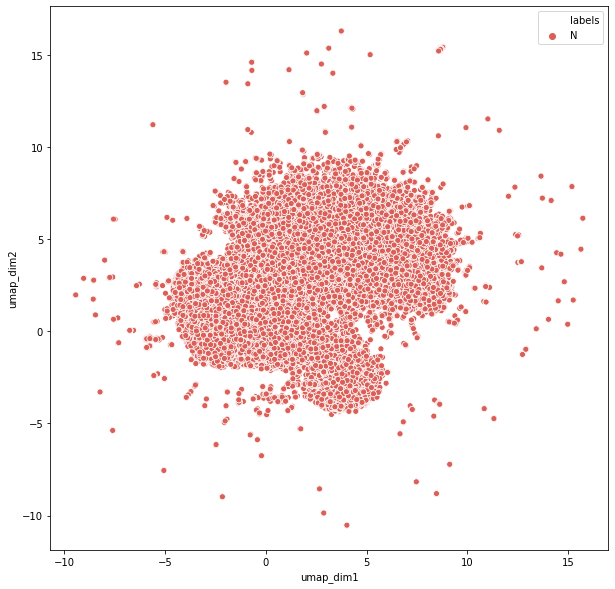

In [51]:
#sets up plotting area and plots it
plt.figure(figsize=(10,10))
sns.scatterplot(
    x="umap_dim1", y="umap_dim2",
    hue="labels",
    palette=sns.color_palette("hls", 1),
    data=umap_data,
    legend="full"
)
plt.show()